In [14]:
# importing libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [15]:
#splitting the data to training and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Data processing

In [16]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
input_shape = (28,28,1)

In [17]:
# convert the vector class to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#converting the data type to 'float32' ensures that the data is in 
#the correct format for numerical computations and enhances compatibility 
#with machine learning libraries and models.

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalisation
x_train = x_train/255
x_test = x_test/255

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


## creating the model

In [24]:
batch_size = 128
# epochs = 15

model = Sequential()
# building the convolutional part
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # this will reduce a quater of the nuerons inturn reducing overfitting
#flatten
model.add(Flatten())
#connect the layers
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5)) #droping 50% of the nuerons
model.add(Dense(num_classes, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [26]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## train the model

In [28]:
hist = model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=5,
                 verbose=1,
                 validation_data=(x_test,y_test))

print('The model has successfully traned')

model.save('mnist.h5')
print('model saved')

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0617 - accuracy: 0.9824 - val_loss: 0.0415 - val_accuracy: 0.9863
Epoch 2/5
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 3/5
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0347 - accuracy: 0.9902 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 4/5
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0292 - val_accuracy: 0.9911
Epoch 5/5
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0353 - val_accuracy: 0.9894
The model has successfully traned
model saved


## Evaluate the model

In [29]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - ETA:  - 5s 484us/step
Test loss: 0.035277919900242705
Test accuracy: 0.9894000291824341


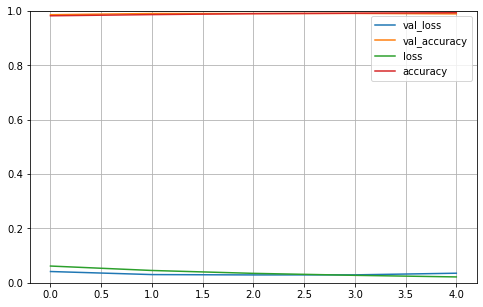

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
# import tensorflow
# from tensorflow.keras import backend
import tensorflow as tf
from tensorflow import keras
del model
backend.clear_session()


NameError: name 'model' is not defined

## creating GUI

In [45]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load your trained model
model_path = 'mnist.h5'
with open(model_path, 'rb') as f:
    model_bytes = f.read()
model = keras.models.load_model(model_bytes, compile=False)

# model = keras.models.load_model('mnist.h5', compile=False)

# Create a blank canvas for drawing
canvas_width = 280
canvas_height = 280

# Function to preprocess the drawn image before feeding it into the model
def preprocess_image():
    # Convert the drawn image to grayscale
    image = Image.new('L', (canvas_width, canvas_height))
    draw = ImageDraw.Draw(image)
    draw.rectangle([(0, 0), (canvas_width, canvas_height)], fill='black')
    draw.line(canvas.coords, fill='white', width=20)
    # Resize the image to match the input size of your model
    image = image.resize((28, 28))
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Normalize the pixel values
    image_array = image_array / 255.0
    # Reshape the image array to match the input shape of your model
    image_array = np.reshape(image_array, (1, 28, 28, 1))
    return image_array

# Function to classify the drawn image using the trained model
def classify_image():
    # Preprocess the drawn image
    image_array = preprocess_image()
    # Make predictions using the model
    predictions = model.predict(image_array)
    # Get the predicted class
    predicted_class = np.argmax(predictions[0])
    # Display the predicted class in the GUI
    result_label.config(text=f"Predicted Class: {predicted_class}")

# Create the Tkinter window
window = tk.Tk()
window.title("Image Classifier")

# Create a canvas for drawing
canvas = tk.Canvas(window, width=canvas_width, height=canvas_height, bg='black')
canvas.pack()

# Bind mouse events to the canvas
canvas.bind("<B1-Motion>", lambda event: canvas.draw(event.x, event.y))

# Create a button to classify the drawn image
classify_button = tk.Button(window, text="Classify", command=classify_image)
classify_button.pack(pady=20)

# Create a label to display the predicted class
result_label = tk.Label(window, text="Predicted Class: ")
result_label.pack()

# Start the Tkinter event loop
window.mainloop()


OSError: [Errno 22] Unable to open file (unable to open file: name = '�HDF

', errno = 22, error message = 'Invalid argument', flags = 0, o_flags = 0)

In [2]:
%pwd

'C:\\Users\\HP\\Documents\\Machine learning\\note books'

In [36]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model_path = 'model.h5'
with open(model_path, 'rb') as f:
    model_bytes = f.read()
model = keras.models.load_model(model_bytes, compile=False)


def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

OSError: [Errno 22] Unable to open file (unable to open file: name = '�HDF

', errno = 22, error message = 'Invalid argument', flags = 0, o_flags = 0)